In [2]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [ ]:
folder = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/'

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2024TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2022TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2022TienShandem50cm.tif'
outf = folder+'demWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2024TienShandem50cm.tif'
outf = folder+'demWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# mm3d Mm2dPosSism mmWV2022.tif mmWV2024.tif Dequant=false CorMin=0.1

In [ ]:
tt.micmacPostProcessing(folder=folder+'MEC/',
                         prefile=outf,
                         outprefix=folder)

In [ ]:
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)

In [ ]:
par, perp = tt.projectDisp(folder+'EWmicmac.tif',folder+'NSmicmac.tif',240,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

## Stack Results

In [ ]:
# Cut to same region 
inlist = ['/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083239-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083318-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB16060422-P1BS-016338201010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB25055420-P1BS-016338206010_01_P001.tif']

cutline = '/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp'

for file in inlist:
    tt.micmacExport(file, outname=f'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm{file[-43:-30]}.tif', srs='EPSG:32643', outres=[0.5,-0.5], interp=None, a_ullr=None,cutlineDSName=cutline)


In [ ]:
!#/bin/bash 
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC1/'
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC2/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC3/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC4/' 

In [ ]:
folders = ['/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC1/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/']

In [ ]:
# Projected displacements
azimuth = 240

for folder in folders:
    tt.micmacPostProcessing(folder=folder,
                         prefile='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm24FEB16060422.tif',
                        outprefix=folder)

    #cor = gdal.Open(folder+'Correlmicmac.tif')
    #mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
    ewtif = folder+'EWmicmac.tif'
    nstif = folder+'NSmicmac.tif'
    print('Working in',folder)
    par, perp = tt.projectDisp(ewtif,nstif,azimuth,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'PerpendicularDisp.tif')
perpComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

perpdisp = np.zeros((np.shape(perpComb)[0],np.shape(perpComb)[1],len(folders)))
perpdisp[:,:,0] = perpComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'PerpendicularDisp.tif')
    perpdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)
    #parComb += disp[:,:,i+1]

#parComb[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'ParallelDisp.tif')
parComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

pardisp = np.zeros((np.shape(parComb)[0],np.shape(parComb)[1],len(folders)))
pardisp[:,:,0] = parComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'ParallelDisp.tif')
    pardisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'NSmicmac.tif')
NSComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

NSdisp = np.zeros((np.shape(NSComb)[0],np.shape(NSComb)[1],len(folders)))
NSdisp[:,:,0] = NSComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'NSmicmac.tif')
    NSdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'EWmicmac.tif')
EWComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

EWdisp = np.zeros((np.shape(EWComb)[0],np.shape(EWComb)[1],len(folders)))
EWdisp[:,:,0] = EWComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'EWmicmac.tif')
    EWdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the correl tifs together
baseim = gdal.Open(folders[0]+'Correlmicmac.tif')

corr = np.zeros((np.shape(nodatamask)[0],np.shape(nodatamask)[1],len(folders)))
corr[:,:,0] = baseim.GetRasterBand(1).ReadAsArray()
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'Correlmicmac.tif')
    corr[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Correlations saved from',folder)

corrtot = np.sum(corr,axis=2)
corrtot[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
pardisp_s = (((pardisp[:,:,0]))*corr[:,:,0]/corrtot + (pardisp[:,:,1])*corr[:,:,1]/corrtot + \
          (pardisp[:,:,2])*corr[:,:,2]/corrtot + (pardisp[:,:,3])*corr[:,:,3]/corrtot)
         

pardisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
perpdisp_s = (((perpdisp[:,:,0]))*corr[:,:,0]/corrtot + (perpdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (perpdisp[:,:,2])*corr[:,:,2]/corrtot + (perpdisp[:,:,3])*corr[:,:,3]/corrtot)
         

perpdisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
NSdisp_s = (((NSdisp[:,:,0]))*corr[:,:,0]/corrtot + (NSdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (NSdisp[:,:,2])*corr[:,:,2]/corrtot + (NSdisp[:,:,3])*corr[:,:,3]/corrtot)
         

NSdisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
EWdisp_s = (((EWdisp[:,:,0]))*corr[:,:,0]/corrtot + (EWdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (EWdisp[:,:,2])*corr[:,:,2]/corrtot + (EWdisp[:,:,3])*corr[:,:,3]/corrtot)
         

EWdisp_s[~nodatamask] = -9999

In [ ]:
tt.save_geotiff(perpdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(pardisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(NSdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(EWdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(corrtot,'CorrelStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())

# Vertical Displacements

In [ ]:
dem1file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2022.tif'
dem2file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2024.tif'
nsfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif'
ewfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif'

In [ ]:
#Simple dem difference
dem1 = gdal.Open(dem1file)
dem2 = gdal.Open(dem2file)
nodata = dem1.GetRasterBand(1).GetNoDataValue()
dem_diff = dem2.GetRasterBand(1).ReadAsArray() - dem1.GetRasterBand(1).ReadAsArray()
nodata_mask = (dem1.GetRasterBand(1).ReadAsArray() != nodata)
dem_diff[~nodata_mask] = nodata
tt.save_geotiff(dem_diff,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/DEMdiff.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

In [ ]:
# This takes time 
U = tt.verticalDisp(dem1file,dem2file,nsfile,ewfile,outf='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif')


In [ ]:
# Use correlation file to produce mask
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
U[~mask] = -9999
tt.save_geotiff(U,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispMasked.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

## Profiles along a line

In [3]:
import pygmt
from osgeo import gdal
import pandas as pd
import numpy as np
import rioxarray
from pyproj import Geod
g = Geod(ellps='WGS84')

import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif

In [4]:
# Profile for crossprofiles
endpts = np.array([[78.5842320602900202,41.1471762414386362],
                [78.6387705909006627,41.1705895995165534]])

line = g.inv_intermediate(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1],npts=26,return_back_azimuth=False)

pts = np.array(list(map(lambda i: [line.lons[i],line.lats[i]],np.arange(len(line.lons)))))

In [15]:
# 2D distance between each stack
az1, az2, dist = g.inv(pts[0][0], pts[0][1], pts[1][0], pts[1][1])
tmp1, tmp2, dist2 = g.inv(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1])
dist, dist2

(194.9826735276821, 5264.5321852878105)

In [ ]:
#NOTE: Computer runs out of memory if they are all run at one. Need to save file then open later.
# GMT operates with 0-255 range values. Displacement will not be more than 255 meters unless there is a problem, so I will clamp anything out of range to 0
# and requires xarray data format
im1 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif')
im2 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif')
im3 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')



In [44]:
im1 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif')


In [45]:
##SET THIS##
im = im1
# Define crossprofile 
crossLength = 500
crossSample = 0.5
crossSpacing = 0.5

In [46]:


# Get mask
mask = ((im != im._FillValue) & (im < 255 )).data
# Shift data so that the minimum is zero
im.data[im.data!=im._FillValue] -= im.data[im.data!=im._FillValue].min()
# set nodata to zero
im.data[~mask] = 0
disparr = im.astype(np.double)
# Create crossprofiles along a line
# 2 endpoints provided in pts
# crossprofiles are length/sample spacing along profile/space between each profile
# e is the unit notation for meter
# stack m means the median value (a is average) appended to each profile (+a), +dm appends the MAD deviation too
# Output is lon, lat, dist, azimuth,value of grid, median of stack, MAD of stack
track = pd.DataFrame(columns=['id','lon','lat','linedist','az','val','stackmed','MAD'])
for i in range(0,len(pts)-1):
    tmp = pygmt.grdtrack(disparr,points=np.array([pts[i],pts[i+1]]),binary='id',
                            crossprofile=f'{crossLength}e/{crossSample}e/{crossSpacing}e',stack='m+a+dm')
    tmp.columns = ['lon','lat','linedist','az','val','stackmed','MAD']
    tmp['id'] = np.ones(len(tmp))*i
    # replace lon of individual profile with center of stack
    tmp['lon'] = np.ones(len(tmp))*tmp['lon'][np.round(len(tmp)/2)]
    tmp['lat'] = np.ones(len(tmp))*tmp['lat'][np.round(len(tmp)/2)]
    track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
track.drop(columns=['val'],inplace=True)
print('Hi')
#if im is im1:
    track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularProfiles.txt')
#elif im is im2:
#    track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelProfiles.txt')
#elif im is im3:
#    track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalProfiles.txt')

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_96975/4185017680.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input i

Hi


## Figures of Profile Results

In [47]:
perpdf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/PerpendicularProfiles.txt')
pardf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/ParallelProfiles.txt')
vertdf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalProfiles.txt')

0.0 0.11011926983796982
1.0 0.03359593056499488
2.0 0.17714908657587358
3.0 0.49018023528896304
4.0 0.19404375324535428
5.0 0.31178188661987205
6.0 0.241404006486567
7.0 0.532780349147254
8.0 0.35338710265936113
9.0 0.07224347845213686
10.0 -0.11175254421677794
11.0 0.6061153307163738
12.0 0.47202063096121893
13.0 0.6597412797457722
14.0 0.44735965123630583
15.0 0.46460368629408855
16.0 0.3135342236052767
17.0 0.2015149184711893
18.0 -0.0950051914292831
19.0 -0.05616106631605078
20.0 0.2206110768501417
21.0 0.16693273059837255
22.0 -0.05573279225671257
23.0 0.1389346296059779
0.0 0.23092417927306208
1.0 -0.2158385228207318
2.0 -0.09486870925491919
3.0 -0.26797858157576204
4.0 0.46814239571543226
5.0 0.15847855960745205
6.0 0.01677166074293046
7.0 0.215169004523883
8.0 0.09482363595203669
9.0 -0.24500969611505496
10.0 -0.7857592964435276
11.0 -0.3085316431121914
12.0 -0.19542227360129294
13.0 0.023035891780359474
14.0 -0.32522322865134967
15.0 -0.25663313161343027
16.0 -0.48464836087226

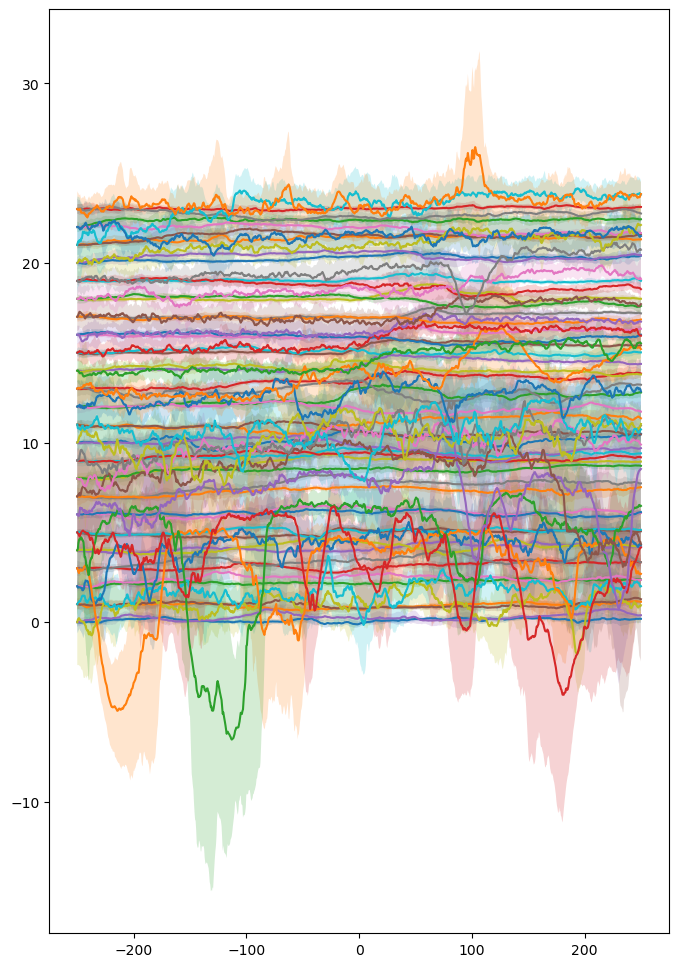

In [48]:
shift = 1
bmin, bmax = 150,250
mediandisp = {'perp':[],'par':[],'vert':[]}
medianad = {'perp':[],'par':[],'vert':[]}
trackdist = {'perp':[],'par':[],'vert':[]}
centerlats = {'perp':[],'par':[],'vert':[]}
centerlons = {'perp':[],'par':[],'vert':[]}
plt.figure(figsize=(8,12))
for track,j in zip([perpdf,pardf,vertdf],mediandisp.keys()):
    for i in track.id.unique():
        prof = track[track.id==i]
        print(i,prof[-bmax:-bmin].stackmed.median()-prof[bmin:bmax].stackmed.median())
        mediandisp[j].append(prof[-bmax:-bmin].stackmed.median()-prof[bmin:bmax].stackmed.median())
        medianad[j].append(stats.median_abs_deviation(prof[-bmax:-bmin].stackmed.values-prof[bmin:bmax].stackmed.values))
        trackdist[j].append(dist*(i+1))
        if i == np.median(track.id.unique()):
            centerlons = prof.lon.unique()
            centerlats = prof.lat.unique()
        plt.plot(prof.linedist,prof.stackmed-prof.stackmed.iloc[0]+i*shift)
        plt.fill_between(prof.linedist,(prof.stackmed-prof.stackmed.iloc[0]+i*shift)-prof.MAD,(prof.stackmed-prof.stackmed.iloc[0]+i*shift)+prof.MAD,alpha=0.2)

#plt.ylim([-6,i*shift+6])

In [49]:
dips = np.arctan(np.array(mediandisp['vert'])/np.array(mediandisp['perp']))*180/np.pi
rakes = list(map(lambda i:np.angle(complex(mediandisp['par'][i],mediandisp['perp'][i]))*180/np.pi,np.arange(0,len(mediandisp['par']))))


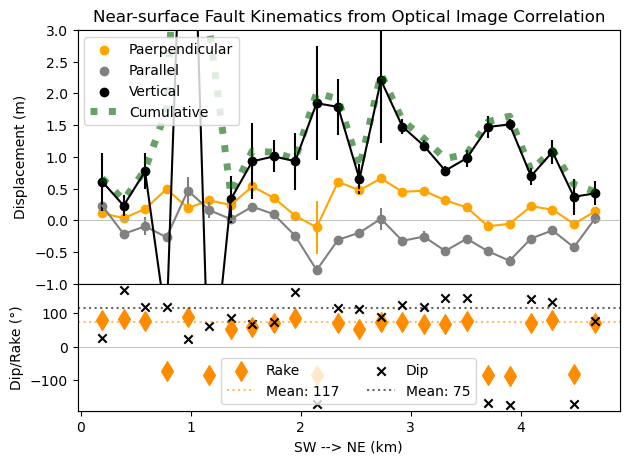

In [50]:
plt.close()
plt.yticks([])
plt.xticks([])
plt.title('Near-surface Fault Kinematics from Optical Image Correlation')
# Displamcents
plt.subplot(3,1,(1,2))
plt.ylim(-1, 3)
plt.xticks([])
for key,c in zip (mediandisp.keys(),['orange','grey','black']):
    # Each slip component with error
    plt.errorbar(np.array(trackdist[key])/1000,np.array(mediandisp[key]),yerr=medianad[key],c=c)
    plt.scatter(np.array(trackdist[key])/1000,np.array(mediandisp[key]),c=c)
# Total Slip
plt.plot(np.array(trackdist[key])/1000,np.sqrt(np.array(mediandisp['par'])**2+np.array(mediandisp['perp'])**2+np.array(mediandisp['vert'])**2),
         c='darkgreen',linestyle=':',linewidth=5,alpha=0.6)
plt.legend(['Paerpendicular','Parallel','Vertical','Cumulative'])
plt.axhline(0,c='darkgrey',linewidth=0.5)
plt.ylabel('Displacement (m)')
# Dip
plt.subplot(3,1,3)
plt.ylabel('Dip (degrees)')
plt.xlabel('SW --> NE (km)')
plt.scatter(np.array(trackdist[key])/1000,dips,marker='d',s=100,c='darkorange')
plt.axhline(np.average(np.abs(dips)),linestyle=':',c='darkorange',alpha=0.6)
plt.scatter(np.array(trackdist[key])/1000,rakes,marker='x',color='black')
plt.axhline(np.average(np.abs(rakes)),linestyle=':',c='black',alpha=0.6)
plt.ylabel('Dip/Rake (°)')
plt.legend(['Rake',f'Mean: {int(np.round(np.average(np.abs(rakes))))}', \
            'Dip',f'Mean: {int(np.round(np.average(np.abs(dips))))}'],ncol=2)
plt.axhline(0,c='darkgrey',linewidth=0.5)
plt.tight_layout(h_pad=-0.6)
#plt.savefig('TienShanOpticalResults.svg',transparent=True,dpi=300)


In [ ]:
# Young's is 10-90,  poisons is 0.1 to 0.15
E = 50e9
nu = 0.22
G = E/(2*(1+nu))
D = 1
M = 4.665e+17
np.sqrt(M/G/D)/1000

In [ ]:
im1 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif')
im2 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif')
im3 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')

baseim = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')

In [51]:
mask = (im1.values[0] != -9999)
cumdisp = np.sqrt(im1.values[0]**2+im2.values[0]**2+im3.values[0]**2)
cumdisp[~mask] = -9999
#tt.save_geotiff(cumdisp,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/CumulativeDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection(),nodata=-9999)



NameError: name 'im2' is not defined

In [52]:
trackdf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/PerpendicularProfiles.txt')

In [54]:
lons, lats, azs =  g.fwd(trackdf.lon,trackdf.lat,az=trackdf.az,dist=trackdf.linedist)

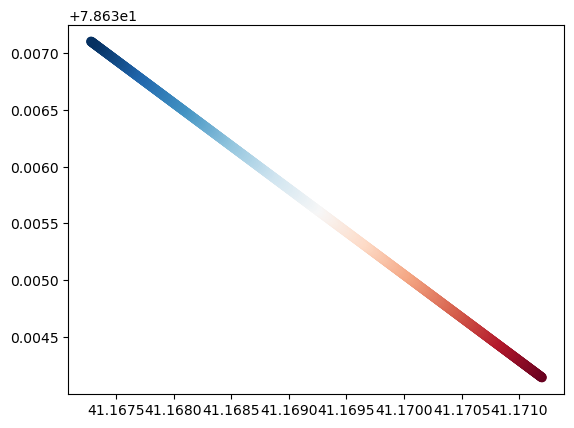

In [75]:
plt.scatter(lats,lons,c=azs,cmap='RdBu')

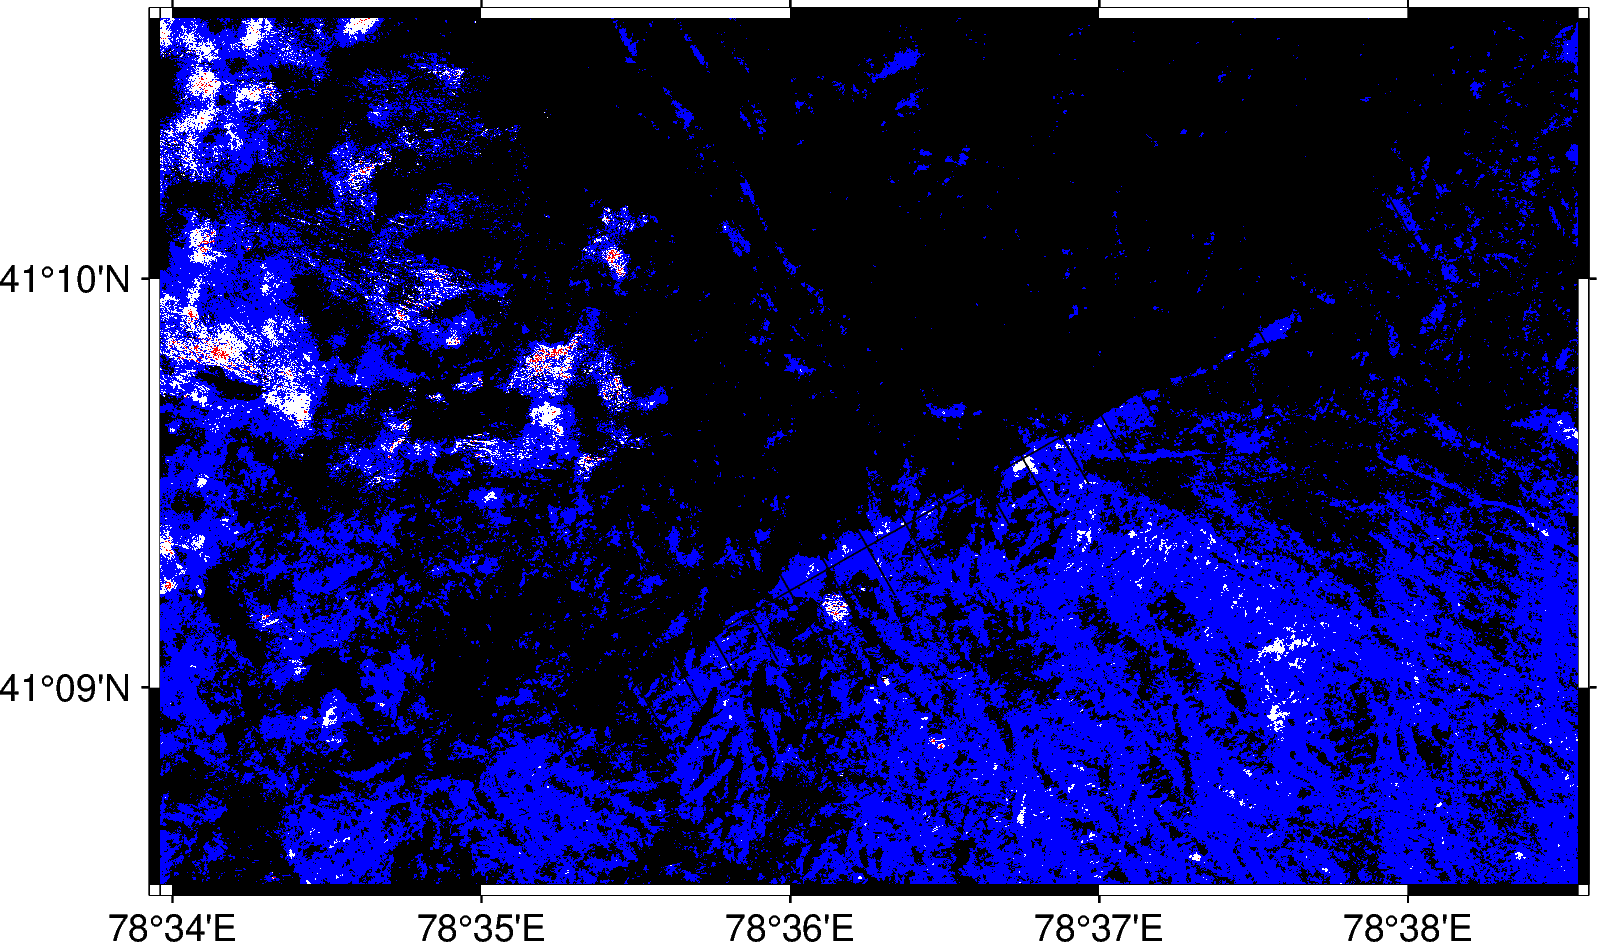

In [99]:
cumdisp = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif'
region = [78.56602,78.64249,41.14197,41.17727]#[798985.5,805640.5,4560833.3,4564588.5]
fig = pygmt.Figure()
# Set up basic map
fig.basemap(
    region=region,#f'{region[0]}/{region[3]}/{region[1]}/{region[2]}+r',
    projection="M12c",  # Mercator projection with a width of 12 centimeters
    frame="a",
)
cpt = pygmt.makecpt(cmap=['blue,white,red'],series='0/2/0.01')
fig.grdimage(cumdisp,)#cmap=['blue,white,red'],)

fig.plot(x=track.lon,y=track.lat)
for i in range(0,len(trackdf.lon.unique())):
    tmp = trackdf[trackdf.lon == trackdf.lon.unique()[i]]
    lons, lats, azs =  g.fwd(tmp.lon,tmp.lat,az=tmp.az,dist=tmp.linedist)
    fig.plot(x=lons,y=lats)

fig.show()

In [ ]:
region = [78.56602,78.64191,41.14197,41.16513]
fig = pygmt.Figure()
# Set up basic map
fig.basemap(
    region=region,
    projection="U52R/12c",  # Mercator projection with a width of 12 centimeters
    frame="af",
)
# Download grid for Earth relief with a resolution of 10 arc-minutes and
# gridline registration [Default]
grid_map = pygmt.datasets.load_earth_relief(
    resolution="10m",
    region=region_map,
)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lower-case "j") with justification
    # Bottom Right and an offset ("+o") of 0.7 centimeters and
    # 0.3 centimeters in x or y directions, respectively
    # Move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w5c/0.3c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and
    # a transparency ("@") of 30 % and with a 0.8-points thick black
    # outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)

# Choose a survey line
fig.plot(
    x=[126, 146],  # Longitude in degrees East
    y=[42, 40],  # Latitude in degrees North
    # Draw a 2-points thick red dashed line for the survey line
    pen="2p,red,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[126, 146],
    y=[42, 40],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin 12.5 centimeters to the top
fig.shift_origin(yshift="12.5c")

fig.basemap(
    region=[0, 15, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and
    # a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l")
    # at the west or left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa2f1+lDistance+u°", "ya4000+lElevation / m"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 15],
    y=[7000, 7000],
    text=["A", "B"],
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line
# and store them in a pandas.DataFrame
track_df = pygmt.project(
    center="126/42",  # Start point of survey line (longitude/latitude)
    endpoint="146/40",  # End point of survey line (longitude/latitude)
    generate="0.1",  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid
# and add it as new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(
    grid=grid_map,
    points=track_df,
    newcolname="elevation",
)

# Plot water masses
fig.plot(
    x=[0, 15],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick black solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick black solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

fig.show()
# Main profile
# 78.5842320602900202,41.1471762414386362 : 78.6333048828235803,41.1682588689903000

fig.show()

In [ ]:
# Profile stacking
def profileExtract():
    '''Reads in a tif file and extracts displacements from the profile'''

def profileStack():

In [ ]:
# Select two points to calcualte profiles
# 800761.8,4561322.0;804785.0,4563820.4
